In [504]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
import plotly.express as px

In [292]:
import warnings
warnings.filterwarnings('ignore')

In [680]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    # drop null datta
    df.dropna(inplace=True)
    # mask visted time
    mask_time =df['No of Times Visited'] == 'None'
    # mask renovated year 
    mask_year = df['Renovated Year'] == 0
    df = df[mask_time & mask_year]
    # droping high and low cardinality data
    df.drop(columns=['Waterfront View','No of Times Visited','ID','Renovated Year','Zipcode'],inplace=True)
    # droping leaking data
    df.drop(columns=['Date House was Sold'],inplace=True) 
    # drop multicolinearity columns 
    df.drop(columns=['Overall Grade','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)','Age of House (in Years)'],inplace=True)
    
    return df

In [681]:
file = 'archive (8)/housing.csv'

In [682]:
df = wrangle(file)

In [683]:
df.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Condition of the House,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Latitude,Longitude
0,221900.0,3,1.0,1180.0,5650.0,1.0,Fair,1180.0,0,47.5112,-122.257
2,180000.0,2,1.0,770.0,10000.0,1.0,Fair,770.0,0,47.7379,-122.233
3,604000.0,4,3.0,1960.0,5000.0,1.0,Excellent,1050.0,910,47.5208,-122.393
4,510000.0,3,2.0,1680.0,8080.0,1.0,Fair,1680.0,0,47.6168,-122.045
5,1230000.0,4,4.5,5420.0,101930.0,1.0,Fair,3890.0,1530,47.6561,-122.005


In [684]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18761 entries, 0 to 21612
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 18761 non-null  float64
 1   No of Bedrooms                             18761 non-null  int64  
 2   No of Bathrooms                            18761 non-null  float64
 3   Flat Area (in Sqft)                        18761 non-null  float64
 4   Lot Area (in Sqft)                         18761 non-null  float64
 5   No of Floors                               18761 non-null  float64
 6   Condition of the House                     18761 non-null  object 
 7   Area of the House from Basement (in Sqft)  18761 non-null  float64
 8   Basement Area (in Sqft)                    18761 non-null  int64  
 9   Latitude                                   18761 non-null  float64
 10  Longitude             

In [685]:
df.describe()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Latitude,Longitude
count,1.876100e+04,18761.000000,18761.000000,18761.000000,1.876100e+04,18761.000000,18761.000000,18761.000000,18761.000000,18761.000000
mean,4.919241e+05,3.344491,2.066281,1994.188423,1.408621e+04,1.492111,1746.785246,247.403177,47.558906,-122.208278
std,2.810946e+05,0.914598,0.734849,834.997605,3.703978e+04,0.540366,794.304666,396.263301,0.140624,0.140059
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,47.155900,-122.519000
25%,3.100000e+05,3.000000,1.500000,1390.000000,5.000000e+03,1.000000,1170.000000,0.000000,47.461900,-122.322000
50%,4.300000e+05,3.000000,2.250000,1840.000000,7.501000e+03,1.500000,1520.000000,0.000000,47.570700,-122.219000
75%,5.989920e+05,4.000000,2.500000,2440.000000,1.024700e+04,2.000000,2160.000000,470.000000,47.680500,-122.120000
max,5.570000e+06,33.000000,7.500000,9200.000000,1.164794e+06,3.500000,8020.000000,3000.000000,47.777600,-121.315000


In [686]:
df.select_dtypes('number')

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Latitude,Longitude
0,221900.0,3,1.00,1180.0,5650.0,1.0,1180.0,0,47.5112,-122.257
2,180000.0,2,1.00,770.0,10000.0,1.0,770.0,0,47.7379,-122.233
3,604000.0,4,3.00,1960.0,5000.0,1.0,1050.0,910,47.5208,-122.393
4,510000.0,3,2.00,1680.0,8080.0,1.0,1680.0,0,47.6168,-122.045
5,1230000.0,4,4.50,5420.0,101930.0,1.0,3890.0,1530,47.6561,-122.005
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530.0,1131.0,3.0,1530.0,0,47.6993,-122.346
21609,400000.0,4,2.50,2310.0,5813.0,2.0,2310.0,0,47.5107,-122.362
21610,402101.0,2,0.75,1020.0,1350.0,2.0,1020.0,0,47.5944,-122.299
21611,400000.0,3,2.50,1600.0,2388.0,2.0,1600.0,0,47.5345,-122.069


In [687]:
df['No of Bathrooms'].max()

7.5

## Creating a function to aggregate the number of bathroom

In [688]:
def f(num):
    if num > 0.0 and num < 0.5:
        return 'no bathroom'
    elif num > 0.4 and num < 1.5:
        return 'one bathroom'
    elif num > 1.4 and num < 2.5:
        return 'Two Bathrooms'
    elif num > 2.4 and num < 3.5:
        return 'three Bathrooms'
    elif num > 3.4 and num < 4.5:
        return 'four bathrooms'
    elif num > 4.4 and num < 5.5:
        return 'five bathroom'
    elif num > 5.4 and num < 6.5:
        return 'six bathrooms'
    elif num > 6.4 and num < 7.5:
        return 'seven bathroom'
    elif num > 7.4 and num < 8.5:
        return 'eight bathrooms'


#### Applying the function on the bathroom colums

In [689]:
df['No of Bathrooms']= df['No of Bathrooms'].map(f)

<AxesSubplot:title={'center':'Number of bathrooms'}>

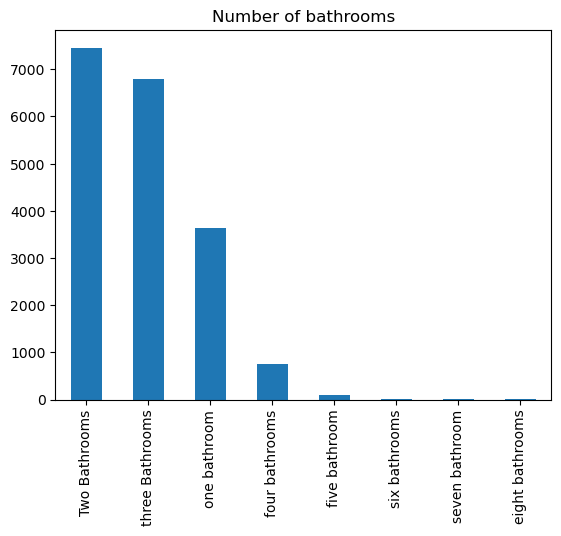

In [690]:
df['No of Bathrooms'].value_counts().plot(kind='bar',title = 'Number of bathrooms')

In [691]:
feature = ['No of Bathrooms']
X_train = df[feature]
target = 'Sale Price'
y_train = df[target]

In [692]:
y_mean = y_train.mean()

In [693]:
print(f'Mean apt Price ${round(y_mean,2)}')

Mean apt Price $491924.12


In [694]:
y_pred_baseline = [y_mean] * len(df)
y_pred_baseline[:5]

[491924.1166249134,
 491924.1166249134,
 491924.1166249134,
 491924.1166249134,
 491924.1166249134]

In [695]:
print(f'Mean_baseline_Error: ${round(mean_absolute_error(y_train,y_pred_baseline),2)}')

Mean_baseline_Error: $192598.09


Creating itterable model

In [696]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
)

In [697]:
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['No of Bathrooms'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [698]:
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['No of Bathrooms'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [699]:
y_pred =model.predict(X_train)

In [700]:
print(f'Training MAE: ${round(mean_absolute_error(y_train,y_pred),2)}')

Training MAE: $168188.02


In [701]:
coeficient = model.named_steps['linearregression'].coef_
features = model.named_steps['onehotencoder'].get_feature_names()

In [702]:
feat_imp = pd.Series(coeficient,index=features)

In [703]:
feat_imp

No of Bathrooms_one bathroom      -8.451824e+16
No of Bathrooms_three Bathrooms   -8.451824e+16
No of Bathrooms_Two Bathrooms     -8.451824e+16
No of Bathrooms_five bathroom     -8.451824e+16
No of Bathrooms_four bathrooms    -8.451824e+16
No of Bathrooms_six bathrooms     -8.451824e+16
No of Bathrooms_eight bathrooms   -8.451824e+16
No of Bathrooms_seven bathroom    -8.451824e+16
No of Bathrooms_nan               -8.451824e+16
dtype: float64

In [704]:
df.select_dtypes('object').nunique()

No of Bathrooms           8
Condition of the House    5
dtype: int64

In [705]:
df.columns

Index(['Sale Price', 'No of Bedrooms', 'No of Bathrooms',
       'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors',
       'Condition of the House', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Latitude', 'Longitude'],
      dtype='object')

In [721]:
fig = px.scatter_mapbox(
    data_frame=df,
    lat='Latitude',
    lon='Longitude',
    color='Sale Price',
    hover_data= ['Sale Price'],
    height=600,
    width=600,
    color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10
)
fig.update_layout(mapbox_style='open-street-map')
fig.show()

<AxesSubplot:>

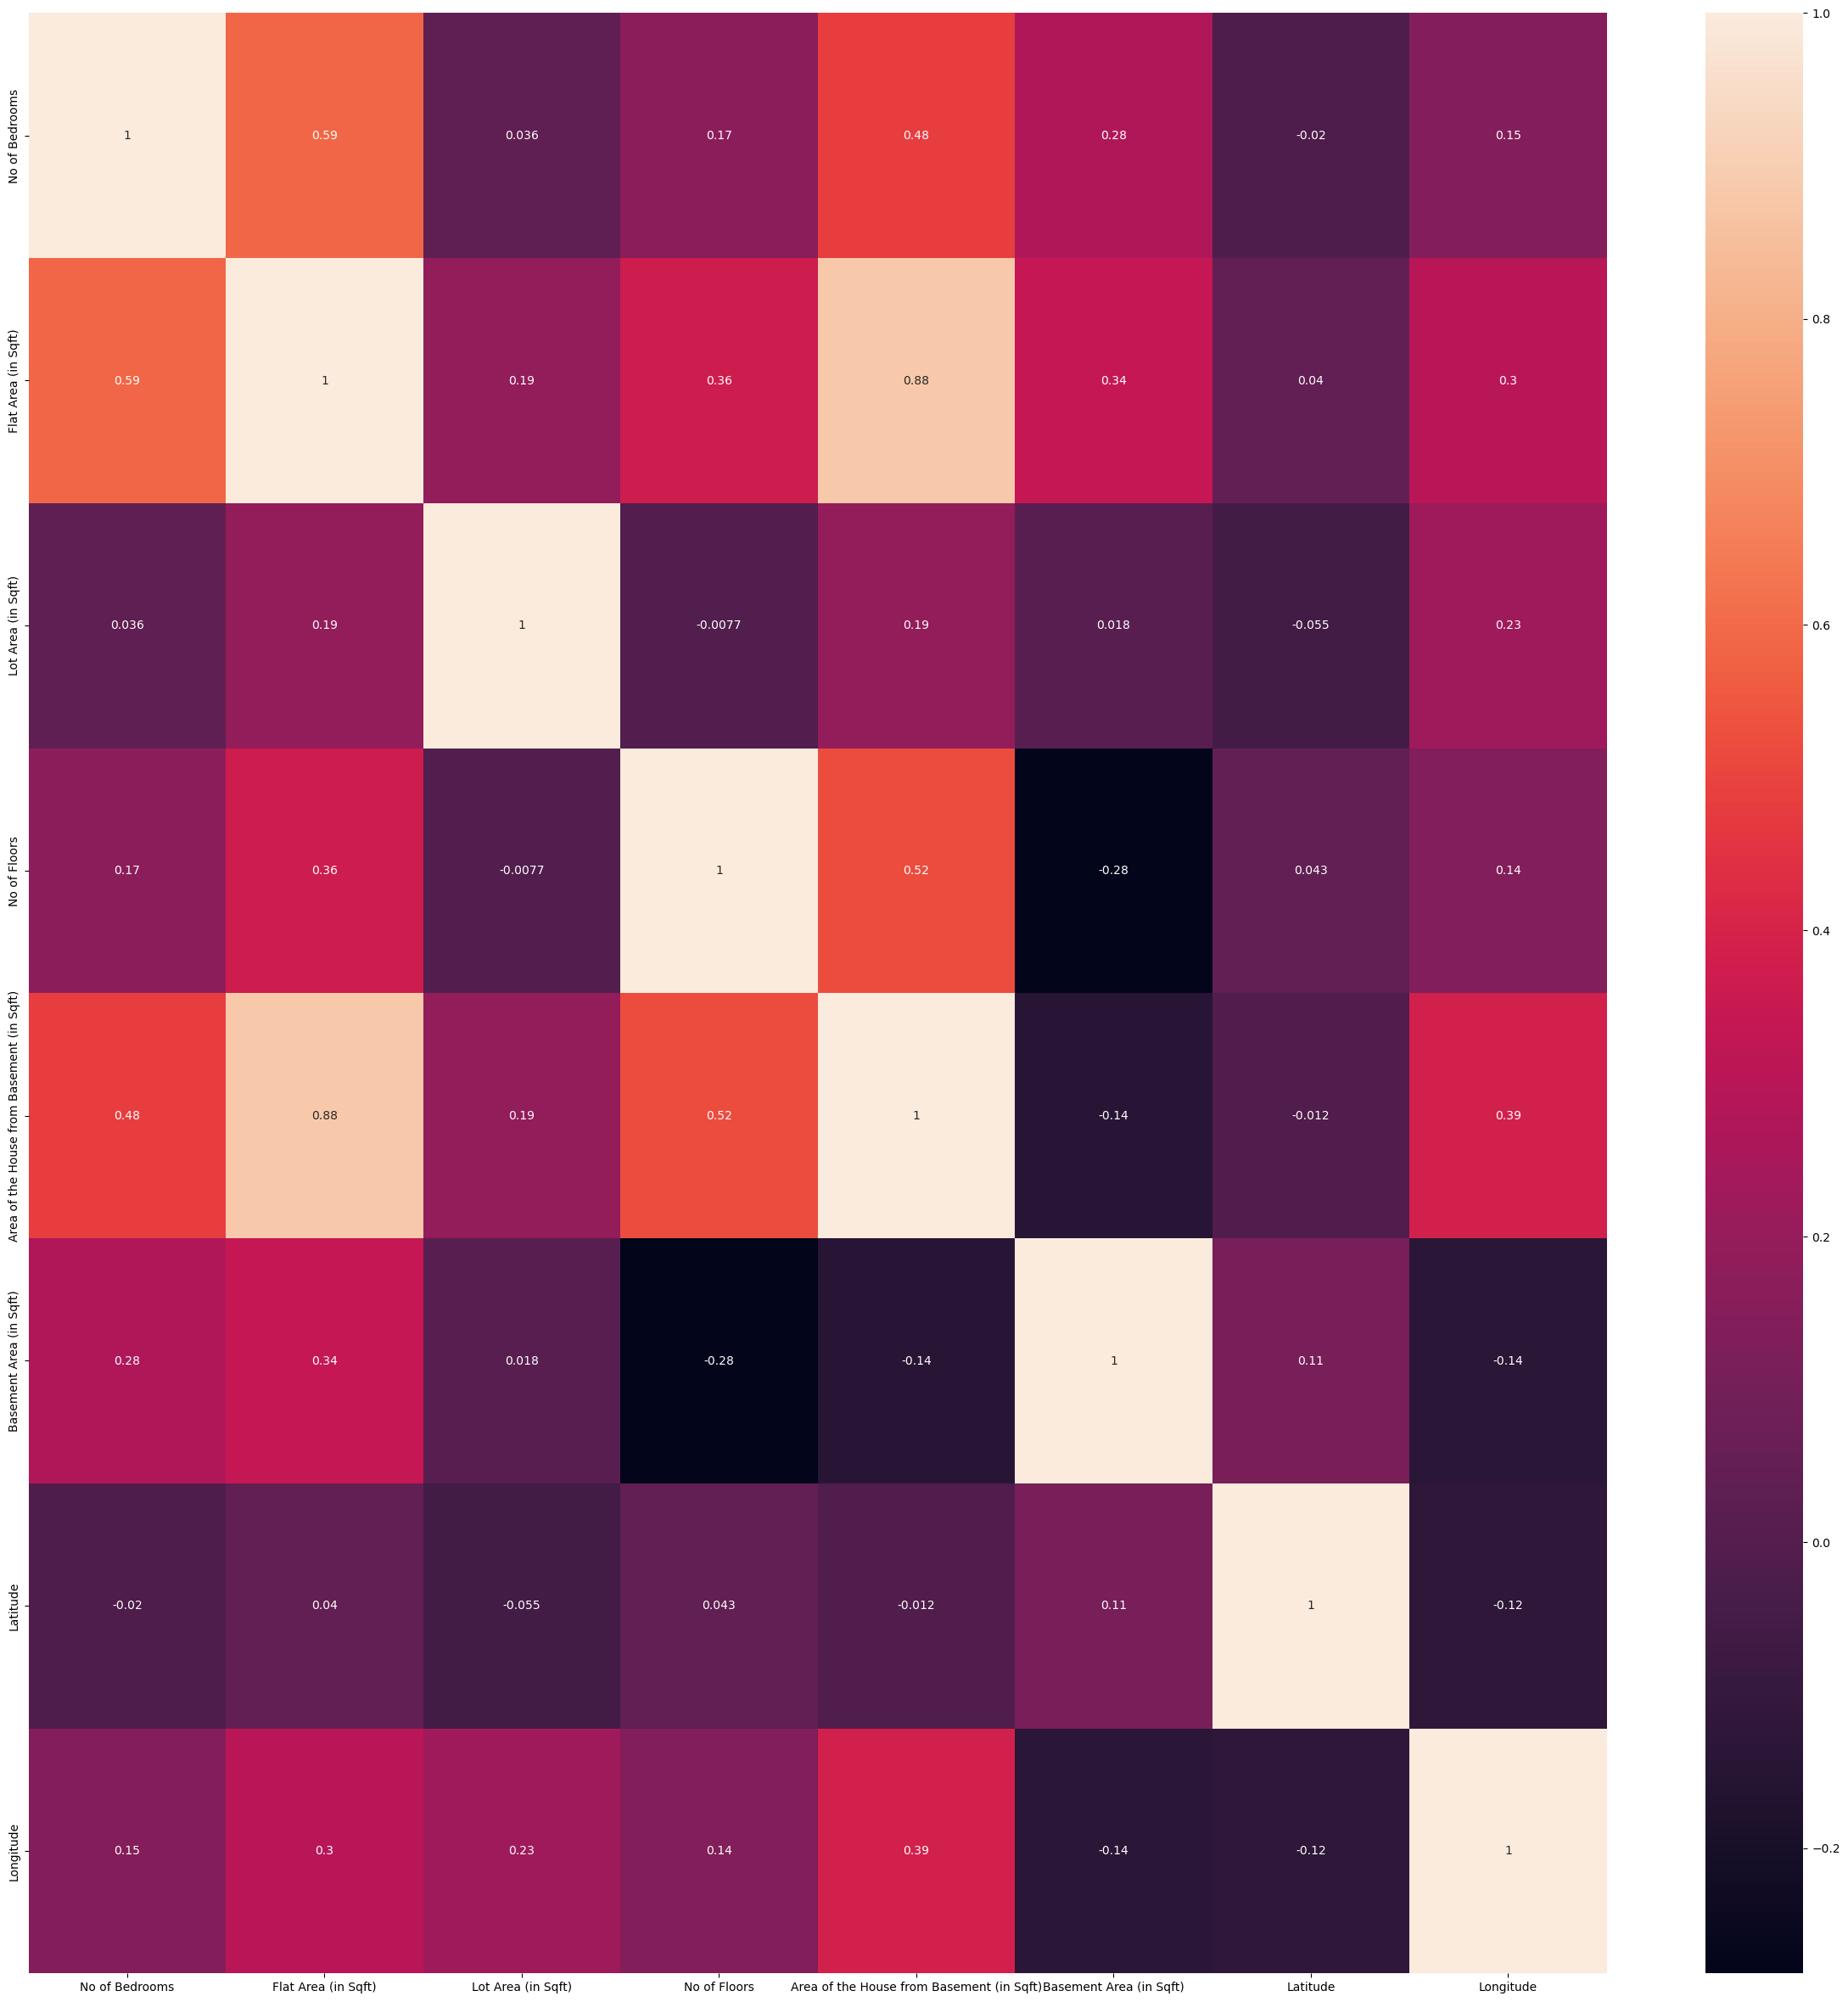

In [717]:
plt.figure(figsize=(30,30))
sns.heatmap(X_train.corr(),annot=True)

## check the relationship between Price and multiple column

In [707]:
X_train = df.drop(columns=['Sale Price'])
y_train = df['Sale Price']

In [708]:
model_1 = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    Ridge()
    
)

In [709]:
model_1.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['No of Bathrooms',
                                     'Condition of the House'],
                               use_cat_names=True)),
                ('ridge', Ridge())])

In [710]:
y_pre = model_1.predict(X_train)

In [711]:
print(f'Absolute Price Model: ${round(mean_absolute_error(y_train,y_pre),2)}')

Absolute Price Model: $114197.81


In [712]:
coeffficents = model_1.named_steps['ridge'].coef_
feature = model_1.named_steps['onehotencoder'].get_feature_names()

In [719]:
feat_imp = pd.Series(coeffficents,index=feature)
feat_imp

No of Bedrooms                              -2.812234e+04
No of Bathrooms_one bathroom                -1.671154e+05
No of Bathrooms_three Bathrooms             -1.965689e+05
No of Bathrooms_Two Bathrooms               -1.806144e+05
No of Bathrooms_five bathroom               -3.274467e+04
No of Bathrooms_four bathrooms              -6.880234e+04
No of Bathrooms_six bathrooms                1.092740e+06
No of Bathrooms_eight bathrooms             -3.082591e+05
No of Bathrooms_seven bathroom               4.119503e+03
No of Bathrooms_nan                         -1.427550e+05
Flat Area (in Sqft)                          1.444581e+02
Lot Area (in Sqft)                           6.901346e-02
No of Floors                                 1.685604e+04
Condition of the House_Fair                 -2.521900e+04
Condition of the House_Excellent             7.347726e+04
Condition of the House_Good                  2.403835e+04
Condition of the House_Bad                  -4.128386e+04
Condition of t

<AxesSubplot:>

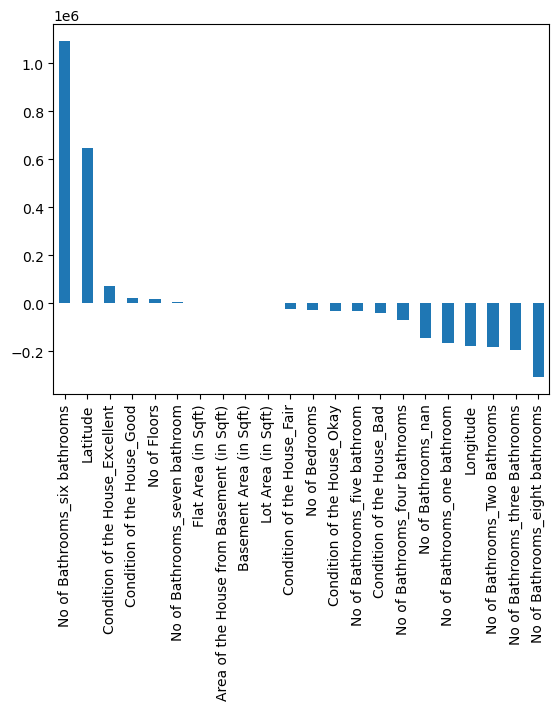

In [720]:
feat_imp.sort_values(ascending=False).plot(kind='bar')